# Getting started

## Data representation

### Time series

In [1]:
import pandas as pd
from tsfuse.data import Collection

X = {
    'x1': Collection(pd.DataFrame({
        'id':   [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
        'time': [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2],
        'data': [1, 2, 3, 1, 2 ,3, 1, 2, 3, 3, 2, 1, 3, 2, 1, 3, 2, 1],
    })),
    'x2': Collection(pd.DataFrame({
        'id':   [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
        'time': [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2],
        'data': [1, 2, 3, 1, 2 ,3, 1, 2, 3, 1, 2, 3, 1, 2 ,3, 1, 2, 3],
    })),
}

### Labels

In [2]:
y = pd.Series(index=[0, 1, 2, 3, 4, 5], data=[0, 0, 0, 1, 1, 1])

## Feature construction

In [3]:
from tsfuse import construct
features, graph = construct(X, y, transformers='minimal', return_graph=True)

In [4]:
features

,"Kurtosis(Ratio(Input(x1), Input(x2)))","Max(Ratio(Input(x1), Input(x2)))","Mean(Ratio(Input(x1), Input(x2)))","Min(Ratio(Input(x1), Input(x2)))","Skewness(Ratio(Input(x1), Input(x2)))","StandardDeviation(Ratio(Input(x1), Input(x2)))","Variance(Ratio(Input(x1), Input(x2)))"
0,NaN,1.0,1.000000,1.000000,NaN,0.000000,0.000000
1,NaN,1.0,1.000000,1.000000,NaN,0.000000,0.000000
2,NaN,1.0,1.000000,1.000000,NaN,0.000000,0.000000
3,-1.5,3.0,1.444444,0.333333,0.528005,1.133115,1.283951
4,-1.5,3.0,1.444444,0.333333,0.528005,1.133115,1.283951
5,-1.5,3.0,1.444444,0.333333,0.528005,1.133115,1.283951


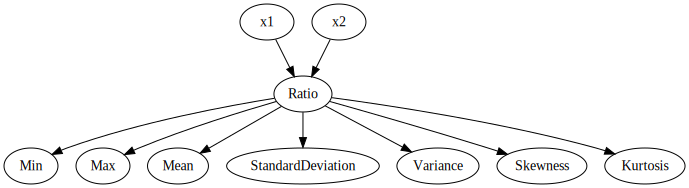

In [5]:
graph

In [6]:
graph.transform(X)

,"Kurtosis(Ratio(Input(x1), Input(x2)))","Max(Ratio(Input(x1), Input(x2)))","Mean(Ratio(Input(x1), Input(x2)))","Min(Ratio(Input(x1), Input(x2)))","Skewness(Ratio(Input(x1), Input(x2)))","StandardDeviation(Ratio(Input(x1), Input(x2)))"
0,NaN,1.0,1.000000,1.000000,NaN,0.000000
1,NaN,1.0,1.000000,1.000000,NaN,0.000000
2,NaN,1.0,1.000000,1.000000,NaN,0.000000
3,-1.5,3.0,1.444444,0.333333,0.528005,1.133115
4,-1.5,3.0,1.444444,0.333333,0.528005,1.133115
5,-1.5,3.0,1.444444,0.333333,0.528005,1.133115


## Feature computation

In [7]:
from tsfuse.computation import Graph
graph = Graph()

In [8]:
from tsfuse.computation import Input
input1 = graph.add_node(Input('x1'))
input2 = graph.add_node(Input('x2'))

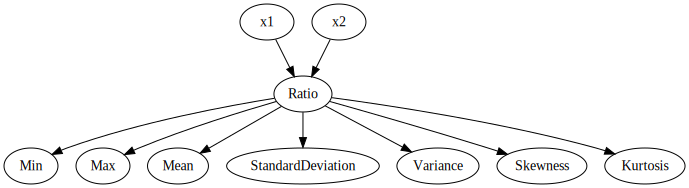

In [9]:
from tsfuse.transformers import *

graph.add_node(Min(Ratio(input1, input2)), i=2)
graph.add_node(Max(Ratio(input1, input2)), i=3)
graph.add_node(Mean(Ratio(input1, input2)), i=4)
graph.add_node(StandardDeviation(Ratio(input1, input2)), i=4)
graph.add_node(Variance(Ratio(input1, input2)), i=5)
graph.add_node(Skewness(Ratio(input1, input2)), i=6)
graph.add_node(Kurtosis(Ratio(input1, input2)), i=7)

graph

In [10]:
graph.transform(X)

,"Kurtosis(Ratio(Input(x1), Input(x2)))","Max(Ratio(Input(x1), Input(x2)))","Mean(Ratio(Input(x1), Input(x2)))","Min(Ratio(Input(x1), Input(x2)))","Skewness(Ratio(Input(x1), Input(x2)))","StandardDeviation(Ratio(Input(x1), Input(x2)))"
0,NaN,1.0,1.000000,1.000000,NaN,0.000000
1,NaN,1.0,1.000000,1.000000,NaN,0.000000
2,NaN,1.0,1.000000,1.000000,NaN,0.000000
3,-1.5,3.0,1.444444,0.333333,0.528005,1.133115
4,-1.5,3.0,1.444444,0.333333,0.528005,1.133115
5,-1.5,3.0,1.444444,0.333333,0.528005,1.133115
